# ESE 523: QuTiP Demo for Homework 1

In [1281]:
# Settings and packages
%matplotlib inline 
import matplotlib.pyplot as plt # package for plotting
import numpy as np # package for numerical analyis

In [1282]:
# Import qutip package
from qutip import *

# Expectation Values

Define the basis states as in problem 1(a):

In [1283]:
N=2 # Dimension of Hilbert space

up = basis(N,0)  # sigma_z eigenstate |up>=(1,0)
dn = basis(N,1)  # sigma_z eigenstate |dn>=(0,1)

psi1 = up 
psi2 = dn
psi3 = (up-dn)/np.sqrt(2)# note he sqrt() function is part of the numpy package
psi4 = (up+1j*dn).unit() # alternatively, we can use the qutip unit() function to normalize the state
psi4 # print result to confirm this is normalized

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678+0.j        ]
 [ 0.00000000+0.70710678j]]

###Calculate the expectation value of the Pauli vector:

In [1284]:
pauli_vec_1 = expect([sigmax(),sigmay(),sigmaz()],psi1)
pauli_vec_1

array([ 0.,  0.,  1.])

In [1285]:
pauli_vec_2 = expect([sigmax(),sigmay(),sigmaz()],psi2)
pauli_vec_2

array([ 0.,  0., -1.])

In [1286]:
pauli_vec_3 = expect([sigmax(),sigmay(),sigmaz()],psi3)
pauli_vec_3

array([-1.,  0.,  0.])

In [1287]:
pauli_vec_4 = expect([sigmax(),sigmay(),sigmaz()],psi4)
pauli_vec_4

array([ 0.,  1.,  0.])

#Spin Hamiltonian

It is common throughout the literature to work in natural units with $h=1$, such that the Hamiltonian takes units of frequency rather than energy, and Schroedinger's equation is  $H|\psi\rangle=i\partial|\psi\rangle/\partial t$.

In [1288]:
# Define the Hamiltonian:
g=2 # g-factor for free electron
muB=0.0028 # Bohr magneton (GHz/gauss).  In natural units, muB/h = 2.8 MHz/gauss

Bx = 100 # (gauss) Choose another number if you like
By = 0
Bz = 0



H = 0.5*g*muB*(Bx*sigmax()+By*sigmay()+Bz*sigmaz())
H # print result

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.    0.28]
 [ 0.28  0.  ]]

###Find the eigenvalues and eigenvectors:

In [1289]:
[ev,es] = H.eigenstates()
print("Eigenenergies = ",ev,"GHz") # eigenenergies

Eigenenergies =  [-0.28  0.28] GHz


### And the corresponding eigenstates:

In [1290]:
es[0] # Corresponding to lower energy

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

In [1291]:
es[1] # Corresponding to higher energy

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.70710678]
 [ 0.70710678]]

## Evaluate the spin dynamics

We will use qutip's master equation numerical solver mesolve(), which is a more general formulation than the Schroedinger equation that can also account for non-unitary evolution (e.g., decoherence).   But by leaving the fourth argument of the function empty, no decoherence is introduced so the function returns a numerical approximation for the unitary dynamics.  

In [1292]:
tlist = np.linspace(0.0,20.0,100) # list of 100 times to calculate (units are nanoseconds, since H is in GHz)
psi_init = psi1

result1 = mesolve(H,psi1,tlist,[],[sigmax(),sigmay(),sigmaz()])
result2 = mesolve(H,psi2,tlist,[],[sigmax(),sigmay(),sigmaz()])
result3 = mesolve(H,psi3,tlist,[],[sigmax(),sigmay(),sigmaz()])
result4 = mesolve(H,psi4,tlist,[],[sigmax(),sigmay(),sigmaz()])

Note that you can get help on mesolve or any other function using the python help() command:

In [1293]:
help(mesolve)

Help on function mesolve in module qutip.mesolve:

mesolve(H, rho0, tlist, c_ops=[], e_ops=[], args={}, options=None, progress_bar=None, _safe_mode=True)
    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.
    
    Evolve the state vector or density matrix (`rho0`) using a given
    Hamiltonian (`H`) and an [optional] set of collapse operators
    (`c_ops`), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian.
    
    The output is either the state vector at arbitrary points in time
    (`tlist`), or the expectation values of the supplied operators
    (`e_ops`). If e_ops is a callback function, it is invoked for each
    time in `tlist` with time and the state as arguments, and the function
    does not use any return values.
    
    If either `H` or the Qobj e

##Plot the results

The code below uses the matplotlib plotting package.  You can get find help and demos for creating different types of plots by navigating to Help/Matplotlib at the top of the page.

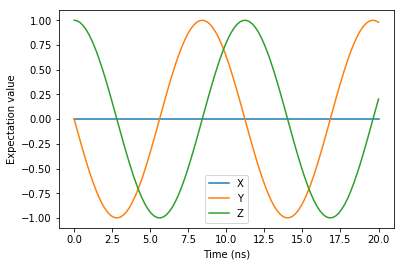

In [1294]:
result_to_plot = result1 # Choose one of the completed simulations

def show_plot(result_to_plot):
    fig, ax = plt.subplots()
    ax.plot(result_to_plot.times,result_to_plot.expect[0])
    ax.plot(result_to_plot.times,result_to_plot.expect[1])
    ax.plot(result_to_plot.times,result_to_plot.expect[2])
    ax.set_xlabel('Time (ns)')
    ax.set_ylabel('Expectation value')
    ax.legend(("X","Y","Z"));
    plt.show()
show_plot(result_to_plot)

You can also plot these dynamics on the Bloch sphere using QuTiP's bloch() function:

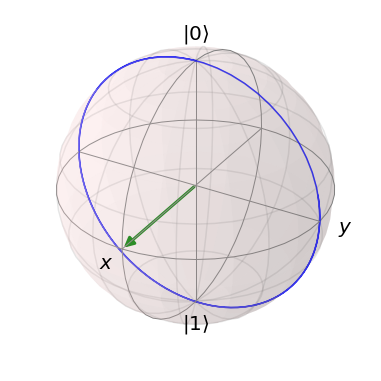

In [1295]:
def show_bloch(result_to_plot):
    sphere = Bloch()
    sphere.add_vectors([1,0,0]) # Add a vector showing the B-field direction
    sphere.add_points(result_to_plot.expect,meth='l') # Draw the calculated spin projections as a line trajectory
    sphere.show()
show_bloch(result_to_plot)

## Your turn!

Now, try changing some of the parameters, like the initial spin states or the direction of the magnetic field.  For example, try a magnetic field vector in the $y$-$z$ plane.  You can change the parameters above and re-run the notebook or keep adding additional cells below.  Once you are finished, save your notebook to .html and upload it to canvas.  Have fun!

# My addition: Adding Errors
The QuTiP package lets us model the gradual degradation of a qubit during the simulation by adding collapse operators into the master equation.

One type of error, representing a relaxation channel, corresponds to the qubit spontaneously decaying from a higher energy state (here taken to be $|1\rangle$) to a lower energy state ($|0\rangle$). We model this by adding annihilation to the collapse operator, in the form of $\sigma_m$.

You can see the effect of this in the expectation value of X, which drifts down towards -1 (corresponding to the relaxed state, $|0\rangle$). This also causes the expectation values for Y and Z, which are oscillating, to decay as well. The time for this relaxation is referred to in the literature as $T_1$.

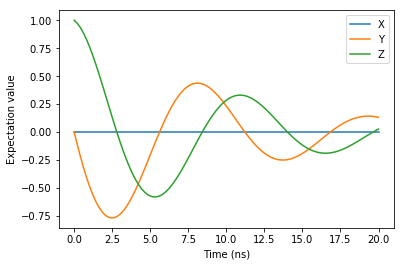

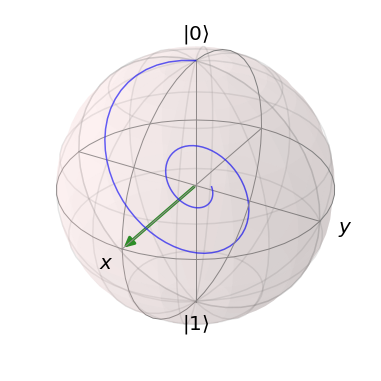

In [1296]:
dissipation_rate = 0.05
c_op = np.sqrt(dissipation_rate)*sigmax()
result = mesolve(H,psi1,tlist,[c_op,],[sigmax(),sigmay(),sigmaz()])
show_plot(result)
show_bloch(result)

Another possibility is true decoherence, which rather than moving the state on the Bloch sphere takes it inside (corresponding to a mixed state). This can be achieved by adding a collapse operator into the evolution of the solver. The rate at which this decoheres is (I believe) referred to as T2 in the literature.

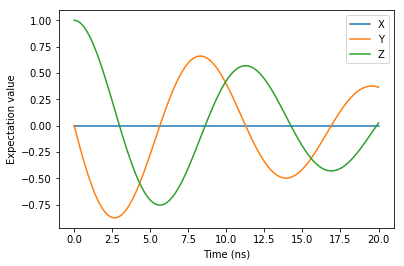

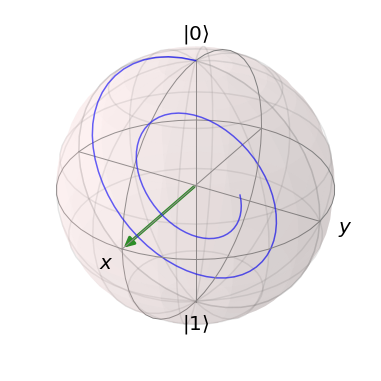

In [1297]:
decoherence_rate = 0.05
c_op = np.sqrt(decoherence_rate) * (sigmaz())
result = mesolve(H,psi1,tlist,[c_op,],[sigmax(),sigmay(),sigmaz()])
show_plot(result)
show_bloch(result)